In [7]:
import pandas as pd
import seaborn as sns
import sys
from Data import dataset
import pickle
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('..')
from utils import get_top_match,plot_3d_heat_map,compute_mesh,visualize_ground_truth


In [13]:
data = dataset()
data.x_y_split(random_seed = 0)
tsdf_volume_test_object_batch,tsdf_volume_test_package_batch,match,ply_test = data.generate_test_data_batch(1)
with open('Results.pickle', "rb") as input_file:
    results = pickle.load(input_file)
    
create_df = lambda results: pd.concat([pd.DataFrame([results[list(results.keys())[i]]]) for i in range(len(results.keys()))],axis = 0)
results_df = create_df(results).reset_index(drop = True)
results_df_normalize = results_df.apply(lambda x: x/match.shape[1], axis = 1)
results_df['test_object_idx'] = results_df.index
results_df_normalize['test_object_idx'] = results_df.index
tidy = pd.melt(results_df_normalize, id_vars=['test_object_idx'], 
               value_vars=['exact_match','one_dist_off_match','two_dist_off_match'],
               var_name='match_type', value_name='match_count')

In [16]:
results_df

,exact_match,one_dist_off_match,two_dist_off_match,test_object_idx
0,2902,5643,6873,0
1,3892,6647,7371,1
2,3433,6388,7267,2
3,3330,6355,7276,3
4,3190,6298,7265,4
...,...,...,...,...
61,3303,6387,7294,61
62,3338,6410,7391,62
63,3442,6502,7290,63
64,3473,6320,7218,64


In [15]:
results_df_normalize

,exact_match,one_dist_off_match,two_dist_off_match,test_object_idx
0,0.391422,0.761128,0.927030,0
1,0.524953,0.896547,0.994200,1
2,0.463043,0.861613,0.980173,2
3,0.449150,0.857162,0.981387,3
4,0.430267,0.849474,0.979903,4
...,...,...,...,...
61,0.445508,0.861478,0.983814,61
62,0.450229,0.864581,0.996898,62
63,0.464257,0.876989,0.983275,63
64,0.468438,0.852441,0.973564,64


In [38]:
np.percentile(np.array(results_df_normalize)[:,2],np.arange(10,100,10))

array([0.97329377, 0.97828433, 0.98131913, 0.9844888 , 0.9878608 ,
       0.98947936, 0.99116536, 0.99244672, 0.99406528])

In [34]:
print(pd.DataFrame(np.percentile(np.array(results_df_normalize)[:,1],np.arange(10,90,10))))

          0
0  0.839493
1  0.849744
2  0.859590
3  0.865255
4  0.870043
5  0.874292
6  0.880564
7  0.889398


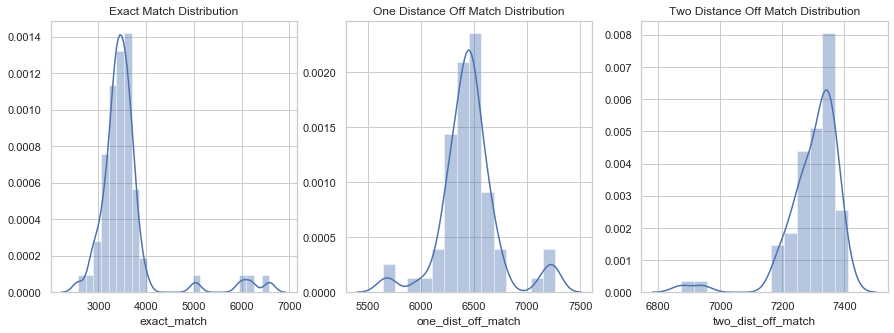

In [18]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 3,figsize=(15,5))
sns.distplot(results_df['exact_match'],ax=ax[0])
ax[0].title.set_text('Exact Match Distribution')
sns.distplot(results_df['one_dist_off_match'],ax = ax[1])
ax[1].title.set_text('One Distance Off Match Distribution')
sns.distplot(results_df['two_dist_off_match'],ax = ax[2])
ax[2].title.set_text('Two Distance Off Match Distribution')


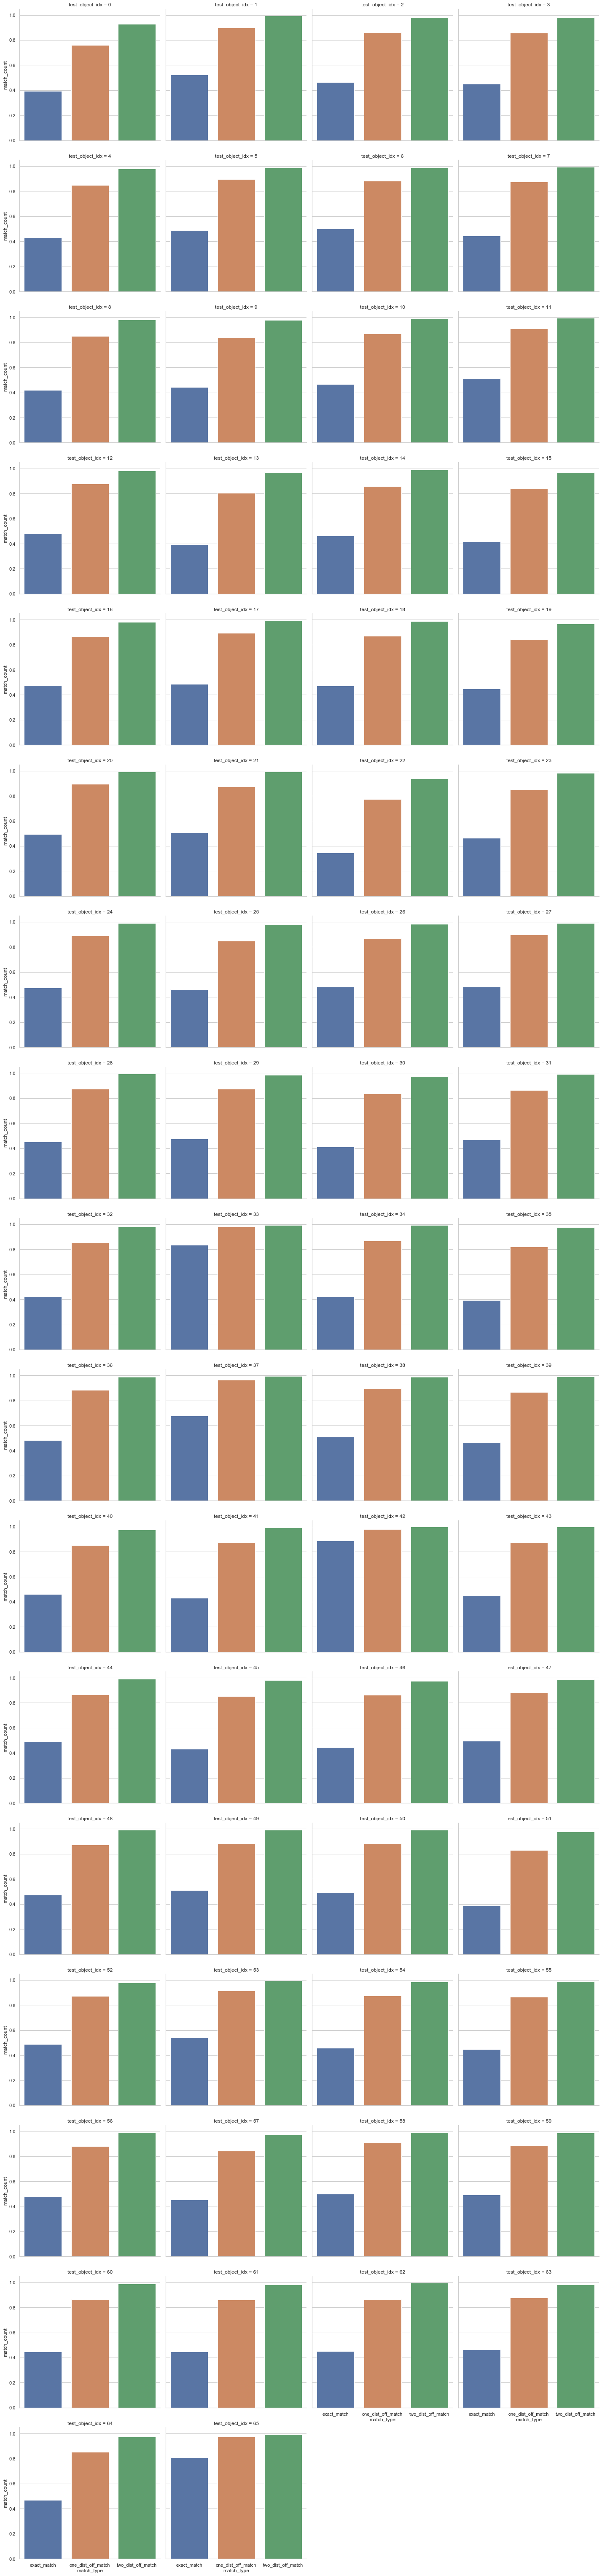

In [83]:
sns.catplot(x="match_type", y="match_count", col="test_object_idx",data=tidy,col_wrap=4, kind="bar",orient = 'v');